In [7]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point

plt.rcParams['figure.figsize'] = (10,5)

In [8]:
pip install folium

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: folium in c:\users\lenovo\appdata\local\programs\python\python312\lib\site-packages (0.18.0)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
permits = gpd.read_file('datasetmap/building_permits_2017.csv')
council_districts = gpd.read_file('datasetmap/council_districts.geojson')

In [13]:
from shapely.geometry import Point
import geopandas as gpd

# Menambahkan kolom 'geometry' berdasarkan koordinat longitude dan latitude
permits['geometry'] = permits.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)

# Membangun GeoDataFrame: permits_geo
permits_geo = gpd.GeoDataFrame(permits, crs=council_districts.crs, geometry=permits.geometry)

# Melakukan join spasial antara permits_geo dan council_districts
permits_by_district = gpd.sjoin(permits_geo, council_districts, predicate='within')
print(f"Contoh data setelah join spasial (2 baris pertama):\n{permits_by_district.head(2)}")

# Membuat permit_counts
permit_counts = permits_by_district.groupby(['district']).size()
print(f"Jumlah izin per distrik:\n{permit_counts}")

Contoh data setelah join spasial (2 baris pertama):
    permit_id      issued      cost        lat         lng  \
0  2017032777  2017-05-24  226201.0  36.198241  -86.742235   
1  2017061156  2017-10-23   15000.0  36.151554  -86.830222   

                     geometry  index_right first_name  \
0  POINT (-86.74224 36.19824)            5      Scott   
1  POINT (-86.83022 36.15155)           21   Kathleen   

                          email     res_phone     bus_phone last_name  \
0     scott.davis@nashville.gov  615-554-9730  615-862-6780     Davis   
1  kathleen.murphy@nashvlle.gov  615-828-4713  615-862-6780    Murphy   

         position district  
0  Council Member        5  
1  Council Member       24  
Jumlah izin per distrik:
district
1     146
10    119
11    239
12    163
13    139
14    261
15    322
16    303
17    786
18    287
19    969
2     399
20    799
21    569
22    291
23    206
24    458
25    435
26    179
27    105
28    119
29    154
3     215
30     79
31    13

In [14]:
# Menambahkan kolom area di council_districts
council_districts['area'] = council_districts.geometry.area
print(f"Hasil awal dari council_districts setelah menambahkan kolom 'area':\n{council_districts.head(2)}")

# Mengonversi permit_counts menjadi DataFrame
permits_df = permit_counts.to_frame()
print(f"Hasil awal dari permits_df setelah dikonversi dari permit_counts:\n{permits_df.head(2)}")

# Mengatur ulang index dan mengganti nama kolom
permits_df.reset_index(inplace=True)
permits_df.columns = ['district', 'bldg_permits']
print(f"Hasil awal dari permits_df setelah mengatur ulang index dan mengganti nama kolom:\n{permits_df.head(2)}")

# Menggabungkan council_districts dan permits_df
districts_and_permits = pd.merge(council_districts, permits_df, on='district')
print(f"Hasil awal dari districts_and_permits setelah penggabungan:\n{districts_and_permits.head(2)}")

Hasil awal dari council_districts setelah menambahkan kolom 'area':
  first_name                           email     res_phone     bus_phone  \
0       Nick     nick.leonardo@nashville.gov  615-509-6334  615-862-6780   
1    DeCosta  decosta.hastings@nashville.gov  615-779-1565  615-862-6780   

  last_name        position district  \
0  Leonardo  Council Member        1   
1  Hastings  Council Member        2   

                                            geometry      area  
0  MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ...  0.022786  
1  MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ...  0.002927  
Hasil awal dari permits_df setelah dikonversi dari permit_counts:
            0
district     
1         146
10        119
Hasil awal dari permits_df setelah mengatur ulang index dan mengganti nama kolom:
  district  bldg_permits
0        1           146
1       10           119
Hasil awal dari districts_and_permits setelah penggabungan:
  first_name                           email    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33388\4156673017.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  council_districts['area'] = council_districts.geometry.area


In [15]:
# Menampilkan tipe data dari districts_and_permits
print(f"Tipe data dari districts_and_permits adalah: {type(districts_and_permits)}")

# Membuat kolom permit_density di districts_and_permits
districts_and_permits['permit_density'] = districts_and_permits.apply(lambda row: row.bldg_permits / row.area, axis=1)

# Menampilkan 5 baris pertama dari districts_and_permits
print(f"5 baris pertama dari districts_and_permits:\n{districts_and_permits.head()}")

Tipe data dari districts_and_permits adalah: <class 'geopandas.geodataframe.GeoDataFrame'>
5 baris pertama dari districts_and_permits:
  first_name                           email     res_phone     bus_phone  \
0       Nick     nick.leonardo@nashville.gov  615-509-6334  615-862-6780   
1    DeCosta  decosta.hastings@nashville.gov  615-779-1565  615-862-6780   
2      Nancy    nancy.vanreece@nashville.gov  615-576-0488  615-862-6780   
3       Bill    bill.pridemore@nashville.gov  615-915-1419  615-862-6780   
4     Robert      robert.swope@nashville.gov  615-308-0577  615-862-6780   

   last_name        position district  \
0   Leonardo  Council Member        1   
1   Hastings  Council Member        2   
2   VanReece  Council Member        8   
3  Pridemore  Council Member        9   
4      Swope  Council Member        4   

                                            geometry      area  bldg_permits  \
0  MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ...  0.022786           146   
1

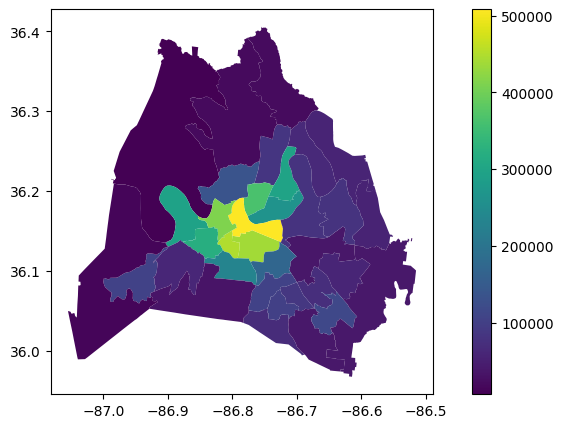

In [16]:
districts_and_permits.plot(column='permit_density', legend=True);

Text(0.5, 1.0, '2017 Building Project Density by Council District')

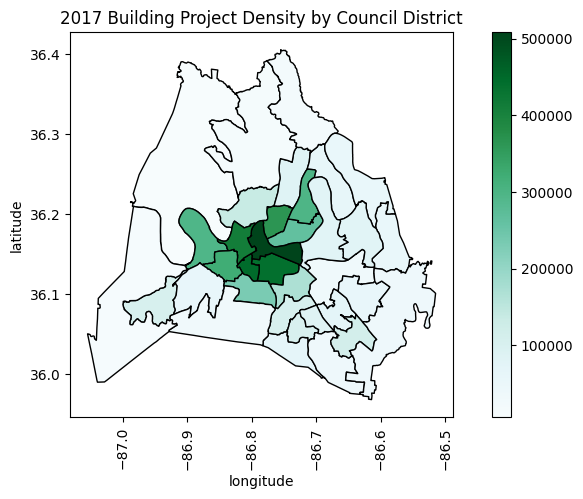

In [17]:
districts_and_permits.plot(column = 'permit_density', cmap = 'BuGn', edgecolor = 'black', legend = True)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.xticks(rotation = 'vertical')
plt.title('2017 Building Project Density by Council District')

In [18]:
# Ubah CRS (koordinat referensi) council_districts ke EPSG:3857
council_districts = council_districts.to_crs(epsg=3857)

# Tampilkan CRS yang digunakan
print(f"CRS saat ini adalah: {council_districts.crs}")

# Tampilkan 5 baris pertama dari data council_districts
print(f"5 baris pertama dari data distrik dewan:\n{council_districts.head()}")

# Menghitung area dalam km persegi
sqm_to_sqkm = 10 ** 6
council_districts['area'] = council_districts.geometry.area / sqm_to_sqkm

# Mengembalikan CRS council_districts ke EPSG:4326
council_districts = council_districts.to_crs(epsg=4326)

# Tampilkan CRS yang digunakan setelah dikembalikan
print(f"CRS setelah dikembalikan ke EPSG:4326 adalah: {council_districts.crs}")

# Tampilkan 5 baris pertama setelah CRS diubah
print(f"5 baris pertama dari data distrik dewan setelah CRS diubah:\n{council_districts.head()}")

CRS saat ini adalah: EPSG:3857
5 baris pertama dari data distrik dewan:
  first_name                           email     res_phone     bus_phone  \
0       Nick     nick.leonardo@nashville.gov  615-509-6334  615-862-6780   
1    DeCosta  decosta.hastings@nashville.gov  615-779-1565  615-862-6780   
2      Nancy    nancy.vanreece@nashville.gov  615-576-0488  615-862-6780   
3       Bill    bill.pridemore@nashville.gov  615-915-1419  615-862-6780   
4     Robert      robert.swope@nashville.gov  615-308-0577  615-862-6780   

   last_name        position district  \
0   Leonardo  Council Member        1   
1   Hastings  Council Member        2   
2   VanReece  Council Member        8   
3  Pridemore  Council Member        9   
4      Swope  Council Member        4   

                                            geometry      area  
0  MULTIPOLYGON (((-9674485.565 4354489.556, -967...  0.022786  
1  MULTIPOLYGON (((-9657970.373 4332440.65, -9657...  0.002927  
2  MULTIPOLYGON (((-9654572.6

In [20]:
# Membuat GeoDataFrame permits_geo dengan koordinat referensi dari council_districts
permits_geo = gpd.GeoDataFrame(permits, crs=council_districts.crs, geometry=permits.geometry)

# Melakukan join spasial antara permits_geo dan council_districts
permits_by_district = gpd.sjoin(permits_geo, council_districts, predicate='within')

# Menghitung jumlah izin bangunan di setiap distrik
permits_counts = permits_by_district.groupby(['district']).size()

# Mengonversi permits_counts menjadi DataFrame dengan dua kolom: district dan bldg_permits
counts_df = permits_counts.to_frame()
counts_df.reset_index(inplace=True)
counts_df.columns = ['district', 'bldg_permits']

# Menampilkan hasil perhitungan izin bangunan di 2 distrik pertama
print(f"Hasil perhitungan izin bangunan untuk 2 distrik pertama:\n{counts_df.head(2)}")

Hasil perhitungan izin bangunan untuk 2 distrik pertama:
  district  bldg_permits
0        1           146
1       10           119


    permit_id      issued      cost        lat         lng  \
0  2017032777  2017-05-24  226201.0  36.198241  -86.742235   
1  2017061156  2017-10-23   15000.0  36.151554  -86.830222   

                     geometry  index_right first_name  \
0  POINT (-86.74224 36.19824)            5      Scott   
1  POINT (-86.83022 36.15155)           21   Kathleen   

                          email     res_phone     bus_phone last_name  \
0     scott.davis@nashville.gov  615-554-9730  615-862-6780     Davis   
1  kathleen.murphy@nashvlle.gov  615-828-4713  615-862-6780    Murphy   

         position district       area  bldg_permits  permit_density  
0  Council Member        5  19.030612           452       23.751207  
1  Council Member       24  21.844122           458       20.966739  


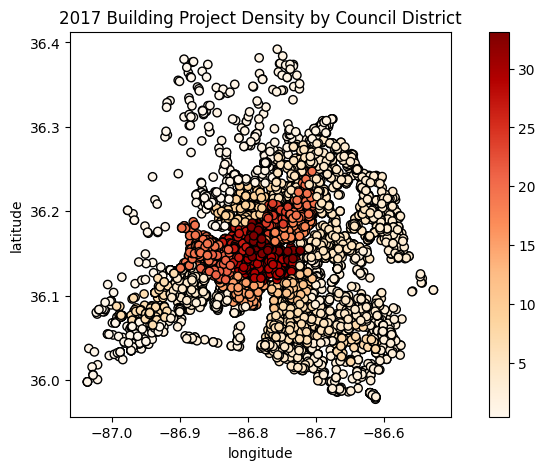

In [21]:
# Merge permits_by_district and counts_df
districts_and_permits = pd.merge(permits_by_district, counts_df, on='district')

# Create permit_density column
districts_and_permits['permit_density'] = districts_and_permits.apply(lambda row: row.bldg_permits / row.area, axis=1)
print(districts_and_permits.head(2))

# Create choropleth plot
districts_and_permits.plot(column='permit_density', cmap='OrRd', edgecolor='black', legend=True);

# Add axis labels and title
plt.xlabel('longitude');
plt.ylabel('latitude');
plt.title('2017 Building Project Density by Council District');

In [23]:
# Center point for Nashville
nashville = [36.1636,-86.7823]

# Create map
m = folium.Map(location=nashville, zoom_start=10)

# Build choropleth
folium.Choropleth(
    geo_data=r'datasetmap/council_districts.geojson',
    name='geometry',
    data=districts_and_permits,
    columns=['district', 'permit_density'],
    key_on='feature.properties.district',
    fill_color='Reds',
    fill_opacity=0.5,
    line_opacity=1.0,
    legend_name='2017 Permitted Building Projects per km squared',
    
).add_to(m)

folium.LayerControl().add_to(m)

m.save('html/permits_choropleth.html')

In [24]:
# Create center column for the centroid of each district
districts_and_permits['center'] = districts_and_permits.geometry.centroid

distinct = []
# Build markers and popups
for row in districts_and_permits.iterrows():
    row_values = row[1] 
    if row_values['district'] not in distinct:
        center_point = row_values['center']
        location = [center_point.y, center_point.x]
        popup = ('Council District: ' + str(row_values['district']) + 
             ';  ' + 'permits issued: ' + str(row_values['bldg_permits']))
        marker = folium.Marker(location = location, popup = popup)
        marker.add_to(m)
        distinct.append(row_values['district'])
    
# Display the map
m.save('html/permits_choropleth2.html')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33388\1362969789.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts_and_permits['center'] = districts_and_permits.geometry.centroid
